In [3]:
# Imports
import os
import pandas as pd
from os import listdir
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pylev

import re

import seaborn as sns
sns.set_style('darkgrid')
sns.color_palette('Spectral')
import matplotlib.pyplot as plt


import requests

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait

In [ ]:
import glob
# Step 1: get a list of all csv files in target directory
my_dir = "/home/mark/coursework/DNA/data"
filelist = []
filesList = []
os.chdir( my_dir )

# Step 2: Build up list of files:
for files in glob.glob("*.txt"):
    fileName, fileExtension = os.path.splitext(files)
    filelist.append(fileName) #filename without extension
    filesList.append(files) #filename with extension
    
    

# Step 3: Build up DataFrame:
df = pd.DataFrame()
for ijk in filesList:
  #  frame = pd.read_csv(ijk)
    user_frame.append(pd.read_csv(ijk, sep='\t', 
                   dtype={'rsid':'str', 'chromosome':'object', 'position':'int', 'genotype':'str'}, 
                   comment='#'), ijk)
    df = df.append(user_frame)
df

In [ ]:
df.ID.nunique()


In [22]:
df['ID']

0          G_v4
1          G_v4
2          G_v4
3          G_v4
4          G_v4
           ... 
2230922    G_v4
2230923    G_v4
2230924    G_v4
2230925    G_v4
2230926    G_v4
Name: ID, Length: 2230927, dtype: object

In [13]:
summary = df.groupby(['genotype', 'ID']).size().unstack().fillna(0)
summary

ID,G_v4
genotype,
--,25585
A,8688
AA,343465
AC,58774
AG,254899
AT,1534
C,8525
CC,422882
CG,2634


KeyError: "None of [Index(['ID', 'genotype'], dtype='object', name='ID')] are in the [index]"

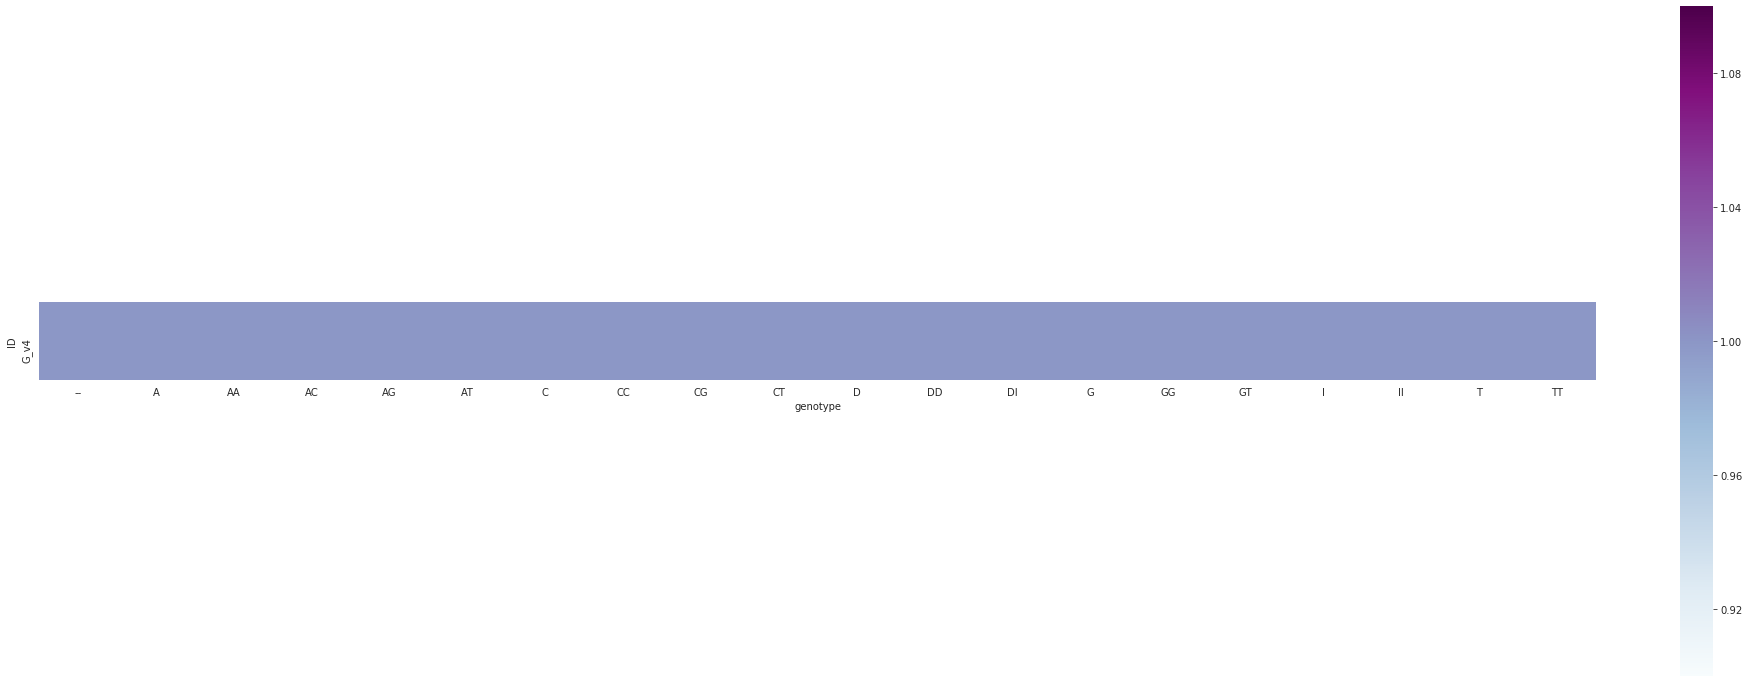

In [19]:
summary_table = (
    df
    .groupby('ID')
    .filter(lambda x : len(x) > 400)
    .groupby(['ID', 'genotype'])
    .size()
    .unstack()
    .fillna(0)
    )
plt.figure(figsize=(30,30))
sns.heatmap(
    summary_table.apply(lambda x : x / x.sum(), axis=0),
    cmap='BuPu',
    square=True,
    cbar_kws = {'fraction' : 0.02}
)

summary_table.loc[['ID', 'genotype']]

In [20]:
# Pairwise comparison 
pairwise = pd.DataFrame(
    squareform(pdist(summary)),
    columns = summary.index,
    index = summary.index
)
pairwise

# make pairwise distance matrix
pairwise_top = pd.DataFrame(
    squareform(pdist(summary_table, metric='cosine')),
    columns = summary_table.index,
    index = summary_table.index
)

# plot it with seaborn
plt.figure(figsize=(20,20))
sns.heatmap(
    pairwise_top,
    cmap='OrRd',
    linewidth=1
)

NameError: name 'squareform' is not defined